<a href="https://colab.research.google.com/github/naoki29839/Coursera_Capstone-/blob/main/solve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                                                                                                 |failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - cffi -> python[version='2.7.*|3.5.*|3.6.*|3.6.12|3.6.12|>=3.6,<3.7.0a0|>=3.7,<3.8.0a0|>=3.9,<3.10.0a0|>=3.8,<3.9.0a0|3.7.9|3.6.9|3.6.9|3.6.9|>=2.7,<2.8.0a0|3.6.9|>=3.5,<3.6.0a0|3.4.*',build='1_73_pypy|3_73_pypy|5_73_pypy|4_73_pypy|2_73_pypy|0_73_pypy']
  - rsa -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that

     |████████████████████████████████| 98 kB 12.0 MB/s eta 0:00:01


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [ ]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [ ]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]


In [ ]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [ ]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [ ]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

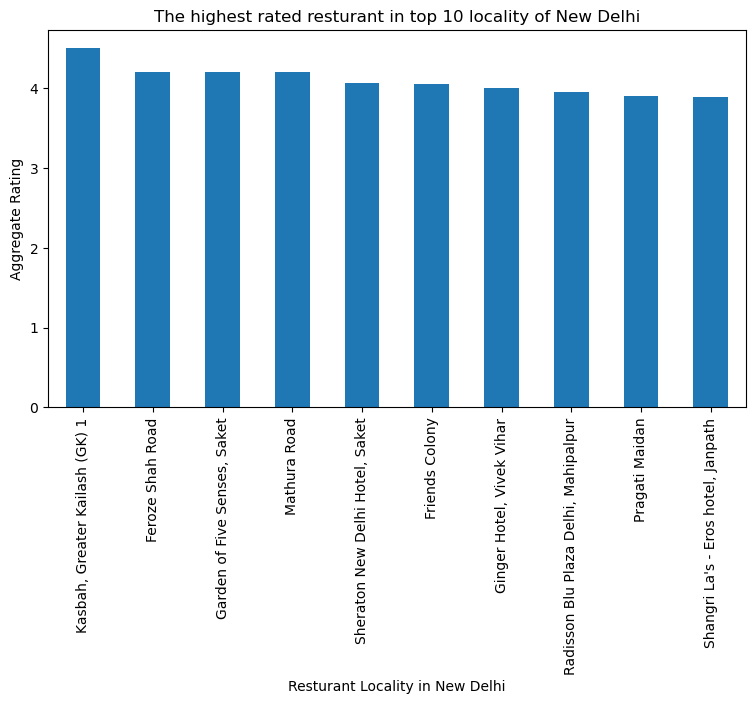

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

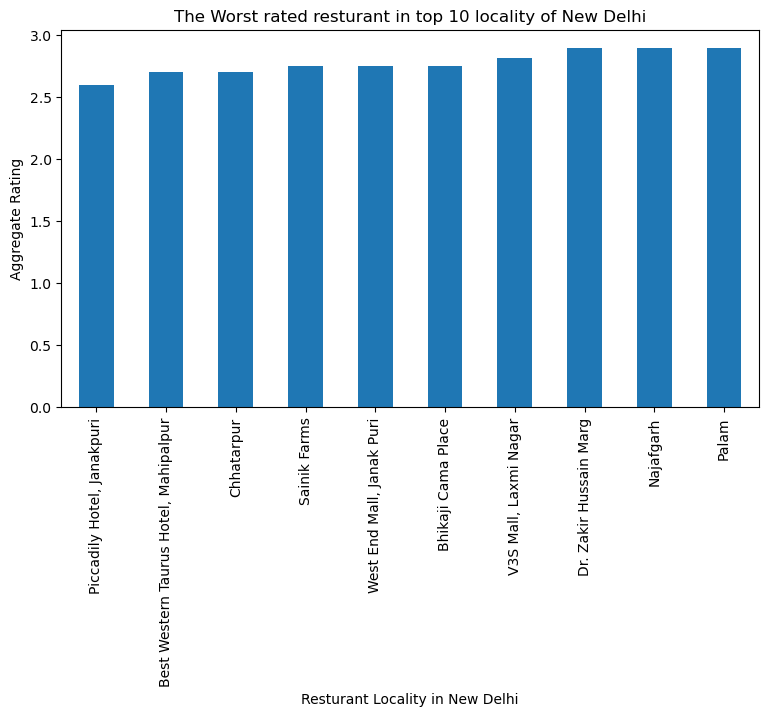

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

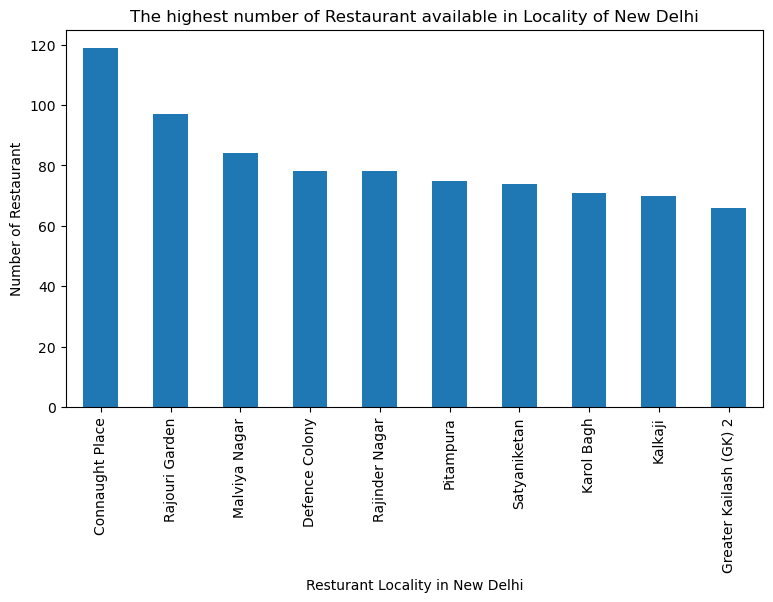

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

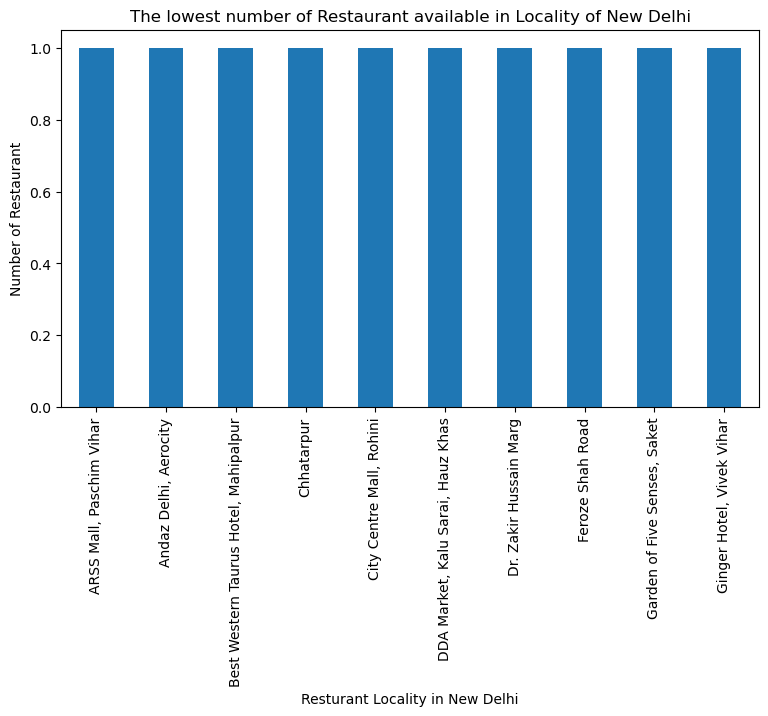

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

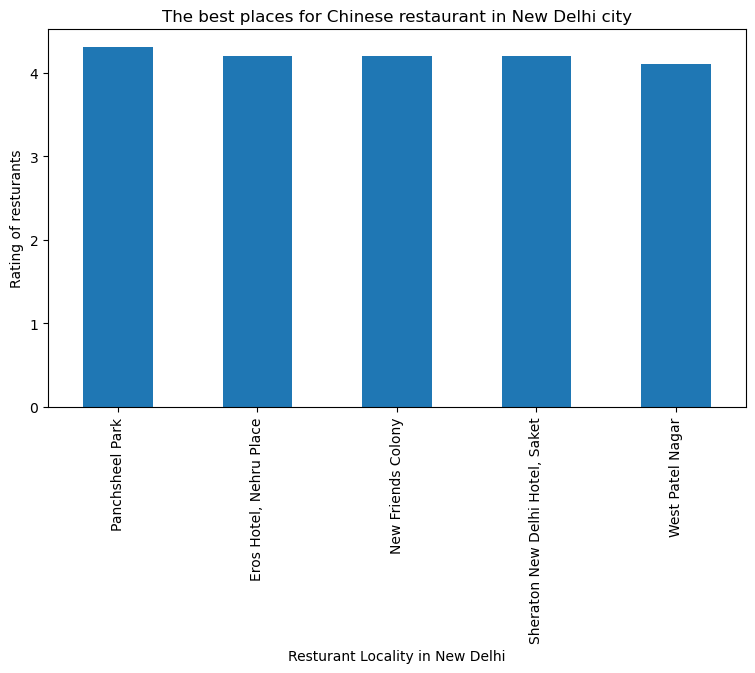

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

In [ ]:

df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [ ]:

df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [ ]:
df_final.shape

(240, 8)

In [ ]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


In [ ]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [ ]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [ ]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         7                   7      7   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   4                   4      4   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 15                  15     15   
West Patel Nagar                                4                   4      4   
Worldmark 1, Aerocity                          32                  32     32   
Yusuf Sarai                                    11                  11     11   
ibis New Delhi, Aerocity                       30                  30     30   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      7                7   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                4                4   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              15               15   
West Patel Nagar                             4                4   
Worldmark 1, Aerocity                       32               32   
Yusuf Sarai                                 11               11   
ibis New Delhi, Aerocity                    30               30   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      7  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                4  
...                                        ...  
West Gate Mall, Rajouri Garden              15  
West Patel Nagar                             4  
Worldmark 1, Aerocity                       32  
Yusuf Sarai                                 11  
ibis New Delhi, Aerocity                    30  

[239 rows x 6 columns]

In [ ]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 209 uniques categories.


In [ ]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                   0        0                   0               0   
1                   0        0                   0               0   
2                   0        0                   0               0   
3                   0        0                   0               0   
4                   0        0                   0               0   

   Airport Service  Airport Terminal  ...  Trail  Train Station  \
0                0                 0  ...      0              0   
1                0                 0  ...      0              0   
2                0                 0  ...      0              0   
3                0                 0  ...      0              0   
4                0                 0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 210 columns]

In [ ]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111            0.00000   
1                           Adchini  0.000000            0.00000   
2     Aditya Mega Mall, Karkardooma  0.000000            0.00000   
3                          Aerocity  0.000000            0.00000   
4     Aggarwal City Mall, Pitampura  0.000000            0.00000   
..                              ...       ...                ...   
234  West Gate Mall, Rajouri Garden  0.000000            0.00000   
235                West Patel Nagar  0.000000            0.00000   
236           Worldmark 1, Aerocity  0.000000            0.03125   
237                     Yusuf Sarai  0.000000            0.00000   
238        ibis New Delhi, Aerocity  0.000000            0.00000   

     Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                  0.0                 0.0      0.0                 0.0   
1                  0.0                 0.0      0.0                 0.0   
2                  0.0                 0.0      0.0                 0.0   
3                  0.0                 0.0      0.0                 0.0   
4                  0.0                 0.0      0.0                 0.0   
..                 ...                 ...      ...                 ...   
234                0.0                 0.0      0.0                 0.0   
235                0.0                 0.0      0.0                 0.0   
236                0.0                 0.0      0.0                 0.0   
237                0.0                 0.0      0.0                 0.0   
238                0.0                 0.0      0.0                 0.0   

     Airport Lounge  Airport Service  Airport Terminal  ...  Trail  \
0          0.000000              0.0          0.000000  ...    0.0   
1          0.000000              0.0          0.000000  ...    0.0   
2          0.000000              0.0          0.000000  ...    0.0   
3          0.142857              0.0          0.142857  ...    0.0   
4          0.000000              0.0          0.000000  ...    0.0   
..              ...              ...               ...  ...    ...   
234        0.000000              0.0          0.000000  ...    0.0   
235        0.000000              0.0          0.000000  ...    0.0   
236        0.000000              0.0          0.000000  ...    0.0   
237        0.000000              0.0          0.000000  ...    0.0   
238        0.000000              0.0          0.000000  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
234       0.000000                 0.0               0.0   
235       0.000000                 0.0               0.0   
236       0.031250                 0.0               0.0   
237       0.000000                 0.0               0.0   
238       0.033333                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
234                            0.0                    0.0         0.0   
235                            0.0                    0.0         0.0   
236                            0.0                    0.0         0.0   
237              

In [ ]:
New_Delhi_grouped.shape

(239, 210)

In [ ]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.29
2                Pub  0.14
3         Restaurant  0.14
4           Boutique  0.14


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2          Multiplex   0.2
3  Indian Restaurant   0.2
4               Café   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1        Airport Lounge  0.14
2           Coffee Shop  0.14
3  Fast Food Restaurant  0.14
4   Rental Car Location  0.14


----Aggarwal City Mall, Pitampura----
                         venue  freq
0             Department Store  0.25
1                  Pizza Place  0.25
2                   Donut Shop  0.25
3         Fast Food Restaurant

                venue  freq
0   Indian Restaurant  0.13
1                 Bar  0.07
2              Lounge  0.07
3      Clothing Store  0.07
4  Chinese Restaurant  0.06


----DLF Promenade Mall, Vasant Kunj----
                  venue  freq
0           Coffee Shop  0.09
1  Fast Food Restaurant  0.07
2        Clothing Store  0.07
3         Shopping Mall  0.07
4                  Café  0.07


----DLF South Square, Sarojini Nagar----
                  venue  freq
0     Indian Restaurant  0.31
1         Women's Store  0.15
2  Fast Food Restaurant  0.15
3            Restaurant  0.08
4                Market  0.08


----Daryaganj----
               venue  freq
0  Indian Restaurant  0.31
1              Hotel  0.15
2         Restaurant  0.15
3             Hostel  0.15
4   Asian Restaurant  0.08


----Defence Colony----
                venue  freq
0  Italian Restaurant  0.18
1   Indian Restaurant  0.18
2              Bakery  0.12
3         Coffee Shop  0.06
4      Sandwich Place  0.06


----Delhi 

                  venue  freq
0         Metro Station  0.17
1           Pizza Place  0.17
2           Bus Station  0.17
3   American Restaurant  0.17
4  Fast Food Restaurant  0.17


----Khan Market----
                venue  freq
0                Café  0.17
1         Coffee Shop  0.09
2  Chinese Restaurant  0.06
3                 Bar  0.06
4           Bookstore  0.04


----Kirti Nagar----
                         venue  freq
0                  Pizza Place  0.50
1            Convenience Store  0.25
2            Fish & Chips Shop  0.25
3                          ATM  0.00
4  Northeast Indian Restaurant  0.00


----Krishna Nagar----
                     venue  freq
0              Pizza Place  0.67
1                     Park  0.33
2                      ATM  0.00
3  North Indian Restaurant  0.00
4       Mughlai Restaurant  0.00


----Lado Sarai----
                    venue  freq
0           Shopping Mall  0.33
1             Golf Course  0.17
2  Furniture / Home Store  0.17
3              

4  Chinese Restaurant  0.07


----Pandav Nagar----
               venue  freq
0       Dessert Shop  0.22
1      Moving Target  0.11
2  Convenience Store  0.11
3               Park  0.11
4        Bus Station  0.11


----Paschim Vihar----
                venue  freq
0         Pizza Place  0.12
1              Market  0.12
2      Sandwich Place  0.12
3  Chinese Restaurant  0.12
4              Garden  0.12


----Patparganj----
               venue  freq
0  Indian Restaurant  0.25
1       Dessert Shop  0.12
2        Pizza Place  0.12
3      Shopping Mall  0.12
4          Gift Shop  0.12


----Piccadily Hotel, Janakpuri----
                  venue  freq
0    Chinese Restaurant  0.23
1     Indian Restaurant  0.15
2           Pizza Place  0.08
3  Fast Food Restaurant  0.08
4        Sandwich Place  0.08


----Pitampura----
                  venue  freq
0                   Gym  0.25
1  Fast Food Restaurant  0.12
2     Indian Restaurant  0.12
3        Ice Cream Shop  0.12
4     Mobile Phone Shop  

                venue  freq
0                Café  0.15
1   Indian Restaurant  0.10
2      Sandwich Place  0.05
3         Coffee Shop  0.05
4  Chinese Restaurant  0.05


----The Taj Mahal Hotel, Mansingh Road----
                 venue  freq
0  Japanese Restaurant   0.2
1    Indian Restaurant   0.2
2            Hotel Bar   0.2
3           Restaurant   0.2
4   Chinese Restaurant   0.2


----The Taj Palace Hotel, Chanakyapuri----
                venue  freq
0   Indian Restaurant  0.12
1               Hotel  0.12
2                Café  0.09
3  Chinese Restaurant  0.06
4            Tea Room  0.03


----The Uppal, Aerocity----
                     venue  freq
0                    Hotel  0.75
1        Indian Restaurant  0.25
2                      ATM  0.00
3  North Indian Restaurant  0.00
4       Mughlai Restaurant  0.00


----The Village Restaurant Complex, Khel Gaon Marg----
                    venue  freq
0                     Bar  0.15
1             Karaoke Bar  0.08
2                  

In [ ]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini     Indian Restaurant   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura      Department Store   
..                              ...                   ...   
234  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
235                West Patel Nagar     Indian Restaurant   
236           Worldmark 1, Aerocity                 Hotel   
237                     Yusuf Sarai     Indian Restaurant   
238        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                     ATM        Sandwich Place                Market   
1                    Café                   Pub              Boutique   
2           Shopping Mall             Multiplex     Indian Restaurant   
3     Rental Car Location        Airport Lounge      Airport Terminal   
4    Fast Food Restaurant            Donut Shop           Pizza Place   
..                    ...                   ...                   ...   
234                  Café           Pizza Place   American Restaurant   
235             Juice Bar     Electronics Store           Pizza Place   
236           Coffee Shop            Restaurant       Bed & Breakfast   
237           Coffee Shop                  Park                   Bar   
238            Restaurant           Coffee Shop                   Spa   

              5th Most Common Venue 6th Most Common Venue  \
0    Multicuisine Indian Restaurant           Coffee Shop   
1                        Restaurant   Dumpling Restaurant   
2                             Hotel                  Café   
3                       Coffee Shop  Fast Food Restaurant   
4                Frozen Yogurt Shop   Fried Chicken Joint   
..                              ...                   ...   
234                  Ice Cream Shop            Hookah Bar   
235                           Diner           Film Studio   
236                             Spa       Thai Restaurant   
237               Korean Restaurant                 Hotel   
238                   Shopping Mall                Bakery   

           7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0             Chinese Restaurant           Pizza Place       Airport Service   
1    Eastern European Restaurant    Dim Sum Restaurant     French Restaurant   
2             African Restaurant           Film Studio   Fried Chicken Joint   
3                 Farmers Market   Fried Chicken Joint     French Restaurant   
4              French Restaurant            Food Truck            Food Court   
..                           ...                   ...                   ...   
234    Middle Eastern Restaurant             Multiplex        Cosmetics Shop   
235           Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
236                   Food Court        Breakfast Spot             Gastropub   
237             Asian Restaurant   Japanese Restaurant        Ice Cream Shop   
238                       Lounge    Light Rail Station       Bed & Breakfast   

          10th Most Common Venue  
0                    Gaming Cafe  
1                     Food Truck  
2              French Restaurant  
3                     Food Truck  
4              Food & Drink Shop  
..                           ...  
234           Chinese Restaurant  
235                   Food Truck  
236           Punjabi Restaurant  
237  Eastern European Restaurant  
238                    Gastropub  

[239 rows x 11 columns]

In [ ]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [ ]:
# add clustering labels
New_Delhi_merged = df_final.head(239)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               4   
1  Average, Good, Poor, Very Good         1560               4   
2                   Average, Good          434               4   
3                         Average           59               2   
4                         Average          126               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM        Sandwich Place   
1     Indian Restaurant                  Café                   Pub   
2           Pizza Place         Shopping Mall             Multiplex   
3                 Hotel   Rental Car Location        Airport Lounge   
4      Department Store  Fast Food Restaurant            Donut Shop   

  4th Most Common Venue           5th Most Common Venue 6th Most Common Venue  \
0                Market  Multicuisine Indian Restaurant           Coffee Shop   
1              Boutique                      Restaurant   Dumpling Restaurant   
2     Indian Restaurant                           Hotel                  Café   
3      Airport Terminal                     Coffee Shop  Fast Food Restaurant   
4           Pizza Place              Frozen Yogurt Shop   Fried Chicken Joint   

         7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Chinese Restaurant           Pizza Place       Airport Service   
1  Eastern European Restaurant    Dim Sum Restaurant     French Restaurant   
2           African Restaurant           Film Studio   Fried Chicken Joint   
3               Farmers Market   Fried Chicken Joint     French Restaurant   
4            French Restaurant            Food Truck            Food Court   

  10th Most Common Venue  
0            Gaming Cafe  
1             Food Truck  
2      French Restaurant  
3             Food Truck  
4      Food & Drink Shop

In [ ]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                  Comments  No_of_Votes  \
4    28.690020    3.033333                   Average          126   
5    28.700516    3.040000       Average, Good, Poor          594   
11   28.562580    3.750000  Average, Good, Very Good          875   
13   28.690182    3.090000       Average, Good, Poor          971   
14   28.693969    3.378571             Average, Good         2343   
..         ...         ...                       ...          ...   
225  28.524070    3.686364  Average, Good, Very Good         4001   
226  28.525054    3.322222             Average, Good         1940   
231  28.637492    3.062264       Average, Good, Poor         1253   
233  28.695096    3.050000                   Average           86   
234  28.630044    2.750000             Average, Poor          238   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
4                 0      Department Store  Fast Food Restaurant   
5                 0           Pizza Place  Gym / Fitness Center   
11                0  Fast Food Restaurant         Shopping Mall   
13                0           Pizza Place            Smoke Shop   
14                0           Pizza Place      Asian Restaurant   
..              ...                   ...                   ...   
225               0           Pizza Place  Fast Food Restaurant   
226               0           Pizza Place                  Bank   
231               0  Fast Food Restaurant           Pizza Place   
233               0                   NaN                   NaN   
234               0    Chinese Restaurant     Indian Restaurant   

    3rd Most Common Venue          4th Most Common Venue  \
4              Donut Shop                    Pizza Place   
5               Multiplex                 Sandwich Place   
11    Japanese Restaurant                    Karaoke Bar   
13              BBQ Joint                         Market   
14       Department Store                    Coffee Shop   
..                    ...                            ...   
225          Dessert Shop  Vegetarian / Vegan Restaurant   
226    Chinese Restaurant           Fast Food Restaurant   
231           Beer Garden                 Ice Cream Shop   
233                   NaN                            NaN   
234           Pizza Place                    Coffee Shop   

    5th Most Common Venue    6th Most Common Venue 7th Most Common Venue  \
4      Frozen Yogurt Shop      Fried Chicken Joint     French Restaurant   
5             Bus Station     Fast Food Restaurant            Restaurant   
11          Women's Store      Fried Chicken Joint     French Restaurant   
13            Snack Place        Indian Restaurant          Dessert Shop   
14         Sandwich Place  South Indian Restaurant     Indian Restaurant   
..                    ...                      ...                   ...   
225                   Spa                      Bar        Sandwich Place   
226                  Café           Sandwich Place                   Spa   
231         Women's Store      Fried Chicken Joint     French Restaurant   
233                   NaN                      NaN                   NaN   
234        Sandwich Place            Metro Station  Fast Food Restaurant   

           8th Most Common Venue 9th Most Common Venue  \
4                     Food Truck            Food Court   
5    Eastern European Restaurant     Electronics Store   
11                    Food Truck            Food Court   
13                         Diner    Frozen Yogurt Shop   
14                Airport Lounge           Gaming Cafe   
..                           ...                   ...   
225           Chinese Restaurant     French Restaurant   
226                          Bar          Dessert Shop   
231                   Food Truck            Food Court   
233                          NaN                   NaN   
234                    BBQ Joint            Restaurant   

            10th Most Common Venue  
4        

In [ ]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
6    28.527088    3.117391                  Average, Good, Poor         1012   
7    28.541298    3.425000             Average, Good, Very Good         2460   
8    28.555599    3.800000                   Average, Very Good         2411   
9    28.659870    3.281481                        Average, Good         1309   
16   28.630440    3.208333                  Average, Good, Poor         1779   
..         ...         ...                                  ...          ...   
228  28.596073    3.052941                        Average, Good          305   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   
230  28.658041    3.400000                              Average           19   
232  28.667344    3.077273                  Average, Good, Poor          939   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
6                 1    Chinese Restaurant                   Bar   
7                 1           Coffee Shop         Shopping Mall   
8                 1               Stadium                  Café   
9                 1                  Café     Convenience Store   
16                1     Indian Restaurant                 Hotel   
..              ...                   ...                   ...   
228               1  Gym / Fitness Center         Women's Store   
229               1                  Café             Pet Store   
230               1     Convenience Store          Burger Joint   
232               1             Juice Bar      Department Store   
237               1                 Hotel           Coffee Shop   

      3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6                     Hotel           Coffee Shop            Steakhouse   
7                      Café      Asian Restaurant        Clothing Store   
8              Dessert Shop                 Hotel  Other Great Outdoors   
9              Burger Joint         Burrito Place         Women's Store   
16                   Bakery               Theater                  Café   
..                      ...                   ...                   ...   
228  Furniture / Home Store   Fried Chicken Joint     French Restaurant   
229             Coffee Shop                Bakery           Cheese Shop   
230           Burrito Place                  Café         Women's Store   
232         Bed & Breakfast     Mobile Phone Shop    Athletics & Sports   
237              Restaurant       Bed & Breakfast                   Spa   

    6th Most Common Venue        7th Most Common Venue 8th Most Common Venue  \
6                  Market         Fast Food Restaurant   Fried Chicken Joint   
7      Italian Restaurant         Fast Food Restaurant     Indian Restaurant   
8             Coffee Shop                  Golf Course           Music Venue   
9             Film Studio          Fried Chicken Joint     French Restaurant   
16                   Pool                       Arcade           Art Gallery   
..                    ...                          ...                   ...   
228            Food Truck                   Food Court     Food & Drink Shop   
229              Tea Room           Chinese Restaurant  Fast Food Restaurant   
230           Film Studio          Fried Chicken Joint     French Restaurant   
232            Smoke Shop  Eastern European Restaurant   Dumpling Restaurant   
237       Thai Restaurant                   Food Court        Breakfast Spot   

      9th Most Common Venue 10th Most Common Venue  
6         French Restaurant             Food Truck  
7        Chinese Restaurant                 Lounge  
8             Metro Station          Women's Store  
9                Food Truck             Food Court  
16                Nightclub      Food & Drink Shop  
..                      ...                    ...  
228         

In [ ]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
71   28.641003    3.650000                        Average, Good          367   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
120  28.673708    3.133333                              Average          113   
128  28.608252    2.945000                        Average, Good          406   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                              Average           50   
163  28.552711    3.100000                              Average            7   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
169  28.667261    3.200000                              Average           76   
174  28.550802    3.250000                        Average, Good           34   
189  28.620715    3.880000             Average, Good, Very Good          626   
197  28.592724    2.985714                              Average          560   
205  28.600171    3.714286             Average, Good, Very Good         1733   
207  28.625445    3.600000             Average, Good, Very Good          843   
210  28.661133    3.775000                      Good, Very Good          460   
212  28.592147    3.350000                        Average, Good          189   
213  28.623619    3.466667                        Average, Good         1141   
217  28.535183    3.066667                              Average           37   
236  28.648177    3.675000             Average, Good, Very Good          876   
238  28.559928    3.075000                        Average, Good          923   

     Cluster Labels 1st Most Common Venue     2nd Most Common Venue  \
3                 2                 Hotel       Rental Car Location   
10                2                 Hotel                       Spa   
12                2                 Hotel         Indian Restaurant   
19                2                 Hotel         Indian Restaurant   
25                2     Indian Restaurant       Japanese Restaurant   
35                2                 Hotel               Pizza Place   
56                2                 Hotel          Sculpture Garden   
60                2                 Hotel         Indian Restaurant   
69                2                 Hotel               Coffee Shop   
70                2                 Hotel                Restaurant   
71                2     Indian Restaurant                     Hotel   
72                2                Garden                     Hotel   
74                2                 Hotel                       Spa   
83                2                 Hotel                Restaurant   
111               2                 Hotel                Restaura

In [ ]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating Comments  No_of_Votes  Cluster Labels  \
145  28.525674         3.3  Average           27               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
145        Cosmetics Shop         Women's Store  Fast Food Restaurant   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
145    Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
145            Food Truck            Food Court     Food & Drink Shop   

    10th Most Common Venue  
145                   Food

In [ ]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
0    28.668945    3.100000                                    Average   
1    28.537063    3.292308             Average, Good, Poor, Very Good   
2    28.656131    3.275000                              Average, Good   
23   28.656414    3.358182                   Average, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
33   28.657388    3.320000                              Average, Good   
42   28.576161    2.983333                        Average, Good, Poor   
43   28.643320    3.287500             Average, Good, Poor, Very Good   
47   28.681582    3.046875                        Average, Good, Poor   
49   28.602169    2.900000                                    Average   
55   28.617102    4.200000                                  Very Good   
66   28.699373    3.252174                              Average, Good   
77   28.631728    3.060714             Average, Good, Poor, Very Good   
84   28.630942    3.122000             Average, Good, Poor, Very Good   
85   28.648885    3.561111                   Average, Good, Very Good   
92   28.584294    3.100000                                    Average   
97   28.662972    3.533333                         Average, Very Good   
98   28.651527    3.490909                   Average, Good, Very Good   
99   28.648795    3.238028             Average, Good, Poor, Very Good   
113  28.541242    2.984615                                    Average   
116  28.486576    2.950000                                    Average   
118  28.646549    3.200000                                    Average   
125  28.627715    3.125000                              Average, Good   
126  28.602860    2.973214                        Average, Good, Poor   
133  28.708185    3.344444                   Average, Good, Very Good   
140  28.627959    3.004167                                    Average   
144  28.591092    3.200000                        Average, Good, Poor   
153  28.608055    3.860000                   Average, Good, Very Good   
156  28.630734    3.185714                              Average, Good   
160  28.712975    3.066667                                    Average   
165  28.539464    2.900000                                    Average   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
176  28.562460    3.269231             Average, Good, Poor, Very Good   
199  28.601779    3.700000                   Average, Good, Very Good   
204  28.597038    3.533333                   Average, Good, Very Good   
209  28.631362    3.537500                              Average, Good   
211  28.579556    3.780000                                       Good   
215  28.605069    3.785714                   Average, Good, Very Good   
223  28.619954    2.905714                              Average, Poor   
235  28.652978    3.500000                                       Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0            117               4     Indian Restaurant                   ATM   
1           1560               4     Indian Restaurant                  Café   
2            434               4           Pizza Place         Shopping Mall   
23          6668               4     Indian Restaurant           Snack Place   
32           494               4     Indian Restaurant        Clothing Store   
33           636               4     Indian Restaurant           Pizza Place   
42           542               4     Indian Restaurant  Fast Food Restaurant   
43          2570               4     Indian Restaurant                 Hotel   
47          1224               4     Indian Restaurant                Market   
49             7               4     Indian Restaurant    Italian Restaurant   
55          3010               4     Indian Restaurant         Women's Store   
66           973               4     Indian Restaurant   